# Project - California Housing Price Prediction

## Description

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

## Background of the Problem Statement

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

## Domain

Finance and Housing

## Dataset Description

Data Dictionary – Variable and Description

- longitude (signed numeric - float) : Longitude value for the block in California, USA
- latitude (numeric - float ) : Latitude value for the block in California, USA
- housing_median_age (numeric - int ) : Median age of the house in the block
- total_rooms (numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block
- total_bedrooms (numeric - float ) : Count of the total number of bedrooms in all houses in the block
- population (numeric - int ) : Count of the total number of population in the block
- households (numeric - int ) : Count of the total number of households in the block
- median_income (numeric - float ) : Median of the total household income of all the houses in the block
- ocean_proximity (numeric - categorical ) : Type of the landscape of the block
  - [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]
- median_house_value (numeric - int ) : Median of the household prices of all the houses in the block

Dataset Size : 20640 rows x 10 columns

## Questions to be answered with analysis

1. Build a model of housing prices to predict median house values in California using the provided dataset.
2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.
3. Predict housing prices based on median_income and plot the regression chart for it.

## Project Guidelines

1. **Load the data** :

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [23]:
# Load the data
path = r"Dataset/housing.csv"  # Path may vary based on your directory structure
data = pd.read_csv(path)

# Print first few rows of this data
print(data.head())

# Extract input (X) and output (Y) data from the dataset
X = data.drop('median_house_value', axis=1)  # Assuming median_house_value is the target variable
Y = data['median_house_value']

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  


2. **Handle missing values** :

In [24]:
# Fill the missing values with the mean of the respective column
numeric_cols = X.select_dtypes(include=[np.number]).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())


# Check if Y has any missing values
if Y.isnull().any():
    print("Y has missing values.")
else:
    print("Y does not have any missing values.")

Y does not have any missing values.


3. **Encode categorical data** :

In [25]:
# Convert categorical column in the dataset to numerical data
X_encoded = pd.get_dummies(X, drop_first=True)


4. **Split the dataset** : 

In [26]:
# Split the data into 80% training dataset and 20% test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

5. **Standardize data** :

In [27]:
# Standardize training and test datasets.
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

6. **Perform Linear Regression** : 

In [28]:
# Perform Linear Regression on training data
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)

# Predict output for test dataset using the fitted model
Y_pred_lr = lr.predict(X_test_scaled)

# Print root mean squared error (RMSE) from Linear Regression
rmse_lr = mean_squared_error(Y_test, Y_pred_lr, squared=False)
print(f'Root Mean Squared Error (RMSE) from Linear Regression: {rmse_lr}')

Root Mean Squared Error (RMSE) from Linear Regression: 70031.41991955662


7. **Perform Decision Tree Regression** :

In [29]:
# Perform Decision Tree Regression on training data
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, Y_train)

# Predict output for test dataset using the fitted model
Y_pred_dt = dt.predict(X_test_scaled)

# Print root mean squared error (RMSE) from Decision Tree Regression
rmse_dt = mean_squared_error(Y_test, Y_pred_dt, squared=False)
print(f'Root Mean Squared Error (RMSE) from Decision Tree Regression: {rmse_dt}')

Root Mean Squared Error (RMSE) from Decision Tree Regression: 69183.14469315283


8. **Perform Random Forest Regression** :

In [32]:

# Perform Random Forest Regression on training data
rf = RandomForestRegressor()
rf.fit(X_train_scaled, Y_train)

# Predict output for test dataset using the fitted model
Y_pred_rf = rf.predict(X_test_scaled)

# Print RMSE (root mean squared error) from Random Forest Regression
rmse_rf = mean_squared_error(Y_test, Y_pred_rf, squared=False)
print(f'Root Mean Squared Error (RMSE) from Random Forest Regression: {rmse_rf}')

Root Mean Squared Error (RMSE) from Random Forest Regression: 48974.95715444691


9. **Bonus exercise: Perform Linear Regression with one independent variable**

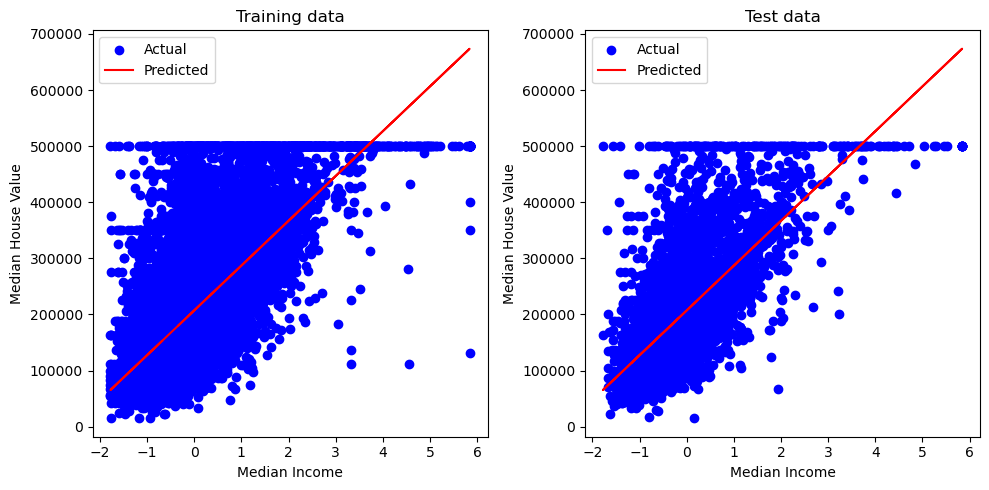

In [33]:

# Extract just the median_income column from the independent variables (from X_train and X_test)
X_train_income = X_train_scaled[:, list(X_train.columns).index('median_income')]
X_test_income = X_test_scaled[:, list(X_test.columns).index('median_income')]

# Need to reshape because sklearn expects 2D array as input
X_train_income = X_train_income.reshape(-1, 1)
X_test_income = X_test_income.reshape(-1, 1)

# Perform Linear Regression to predict housing values based on median_income
lr_income = LinearRegression()
lr_income.fit(X_train_income, Y_train)

# Predict output for test dataset using the fitted model
Y_pred_lr_income = lr_income.predict(X_test_income)

# Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train_income, Y_train, color='blue', label='Actual')
plt.plot(X_train_income, lr_income.predict(X_train_income), color='red', label='Predicted')
plt.title('Training data')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test_income, Y_test, color='blue', label='Actual')
plt.plot(X_test_income, Y_pred_lr_income, color='red', label='Predicted')
plt.title('Test data')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()

plt.tight_layout()
plt.show()